# Simple Linear Regression Algorithm using Python

In [2]:
#Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#imports the CSV dataset using pandas
dataset = pd.read_csv('Salary_Data.csv')

In [4]:
#get the the statistical details of the dataset 
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#validating the null vaues
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

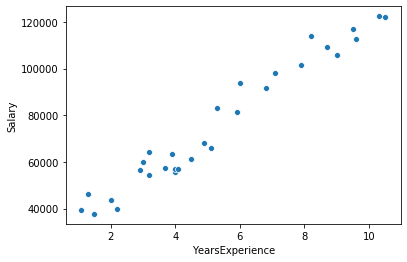

In [6]:
#displaying scatter plot on the salary and years of experiance in y,x axis
sns.scatterplot(dataset['YearsExperience'],dataset['Salary'])


In [7]:
#splitting the values of Years of experiance and salary to x, y
x=dataset['YearsExperience']
y = dataset['Salary']

#Training and testing the data split for 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Fit Simple Linear Regression to the dataset

X_train=X_train.values
X_train=X_train.reshape(-1,1)

y_train=y_train.values
y_train=y_train.reshape(-1,1)

X_test=X_test.values
X_test=X_test.reshape(-1,1)

y_test= y_test.values
y_test=y_test.reshape(-1,1)


# Using sklearn.linear_model getting the coefficent, Intercept and error(MSE)

In [8]:
# Fit Simple Linear Regression to the dataset

# Create the model
model = LinearRegression()

# Train the model, using training data set
m=model.fit(X_train, y_train)

#assgining the values to Theta1
Theta1=model.coef_

# The coefficients
# print the parameter theta1
print('Coefficient = Theta1 =%.3f' %Theta1)


Coefficient = Theta1 =9360.261


In [9]:
#assgining the values to Theta0
Theta0=model.intercept_
# print the parameter theta0
print('Intercept = Theta0 =%.3f' %Theta0)

Intercept = Theta0 =26777.391


In [10]:
# Use trained model to predict on test dataset
y_pred = model.predict(X_test)

In [11]:
#getting yPrediction values (Salary)

MSE= mean_squared_error(y_test, y_pred)
print('Mean Square Error= %.3f' %MSE)

Mean Square Error= 23370078.801


In [12]:
#getting Root Mean Suquare Error
RMSE = math.sqrt(MSE)
print('Root Mean Square Error= %.3f' %RMSE)

print('Variance score = %.2f' % r2_score(y_test, y_pred))

Root Mean Square Error= 4834.261
Variance score = 0.97


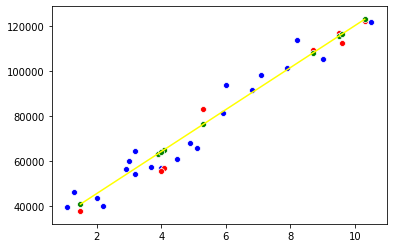

In [13]:
#displaying the training data in blue
sns.scatterplot(X_train.flatten(),y_train.flatten(),color='blue')

#displaying the test data in red
sns.scatterplot(X_test.flatten(),y_test.flatten(),color='red')

#displaying the predicted data in green
sns.scatterplot(X_test.flatten(),y_pred.flatten(),color='green')

#displaying the regression line in yellow
sns.lineplot(X_test.flatten(),y_pred.flatten(),color='yellow')



# Using standard model getting the coefficent, Intercept and error(MSE)

<b>Calculation of Variance</b><br>
variance = sum( (x - mean(x))^2 )

<b>Calculation of Covariance</b><br>
covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

<b>Calculating coefficient</b><br>
Theta1 = covariance(x, y) / variance(x)<br>


<b>Calculating Intercept</b><br>
Theta0 = mean(y) - Theta0 * mean(x)

<b>Calculating the Theta0 and Theta1</b><br>
Theta1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )<br>
Theta0 = mean(y) - B1 * mean(x)

<b>Root Mean Squared Error or RMSE</b><br>
RMSE = sqrt( sum( (pi – yi)^2 )/n )

In [14]:
# Estimate Mean and Variance
#Creating functions for Means and Variance and Covariance
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [15]:
#Calculating Means,Variance and Covariance
mean_x, mean_y = mean(X_train), mean(y_train)
var_x, var_y = variance(X_train, mean_x), variance(y_train, mean_y)
covar = covariance(X_train, mean_x, y_train, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
print('Covariance: %.3f' % (covar))

x stats: mean=4.881 variance=137.652
y stats: mean=72464.381 variance=12797780024.952
Covariance: 1288462.252


In [16]:
#Calculating coefficent
b1=covar/var_x
# print the parameter theta1
print('Coefficient = Theta1 =%.3f' %b1)

#Calculating Intecept
b0=mean_y-b1*mean_x
# print the parameter theta0
print('Intercept = Theta0 =%.3f' %b0)


Coefficient = Theta1 =9360.261
Intercept = Theta0 =26777.391


In [17]:
#prediction of Y
Y_Prediction = b0 + b1*X_test

#calculation of Mean Suqre Error
prediction_error = Y_Prediction - y_test
sum_error = 0.0
for i in range(len(y_test)):
    prediction_error = Y_Prediction[i] - y_test[i]
    sum_error += (prediction_error ** 2)
mean_error = sum_error / float(len(y_test))

print("The Mean Square Error is: = %.3f " % mean_error)

root_mean_error = math.sqrt(mean_error)
print("The Root Mean Square Error is: = %.3f " % root_mean_error)

The Mean Square Error is: = 23370078.801 
The Root Mean Square Error is: = 4834.261 


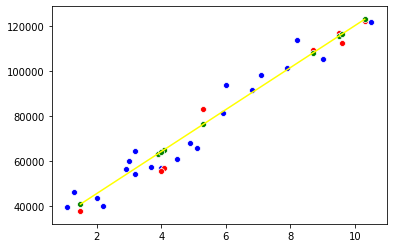

In [18]:
#displaying the training data in blue
sns.scatterplot(X_train.flatten(),y_train.flatten(),color='blue')

#displaying the test data in red
sns.scatterplot(X_test.flatten(),y_test.flatten(),color='red')

#displaying the predicted data in green
sns.scatterplot(X_test.flatten(),y_pred.flatten(),color='green')

#displaying the regression line in yellow
sns.lineplot(X_test.flatten(),y_pred.flatten(),color='yellow')